# Apple Music Statistics
### By Adam Kowalchyk
## Introduction
#### Domain
The domain for this project is Apple Music, and more specifically my family's apple music profile. In this Domain I will be researching the habits found within each device in our Apple Music account. 

The Data Set for this project is labeled by each song played in our Family's Apple Music Profile Spanning from Oct 2019 - Oct 2020. Each Song has the following atrributes of importance:
  - Artist Name
  - Device Identifier (Adam's Iphone, Mom's Iphone, Anna's Iphone, and our family's Amazon Echo)
  - Content Provider (Sony Music, The Warner Music Group, etc.)
  - End Reason Type (Skipped, Paused, etc.)
  - Play Duration
  - Media Duration
  - Event End Timestamp and Start TimeStamp (when the song was played)
 
#### Hypothesees
Before analyzing the data, I had some hypotheses about possible findings in the data to include:
   - The Amazon Echo will be the device with the most total time listened to.
   - The Devices can be easily identified by attributes like Content Name, Artist Name, and Genre.
   - I listen to songs on average longer than every device except the Amazon Echo
   - The average time I spend listening to a song is greater than a minute less than the average length of a song
  
#### Classification
With the large majority of this Notebook being about the differences and similarites between each data set. For my classification, I decided to try and classify the Device Identifier Attribute. Using attributes like Genre and Artist Name, I used a KNN Classifier and a Decision Tree Classifier to predict a certain device (Adam's Iphone, Anna's Iphone,etc.)
- My key findings were that there were many similarities between each devices choice of music, although also an equal amount of differences. 

#### Opening CSV File

In [138]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("AppleMusicStatsNew.csv",header=0)

## Data Cleaning

#### Adding Genre DataFrame

In [139]:
genres = pd.read_csv("genres.csv")
df["genre"] = genres
df.to_csv("new.csv")

##### Decoding Device Identifiers

In [140]:
    ser = df["Device Identifier"].copy()
    for i in range(0, len(ser)):
        curr = str(ser[i])
        if curr == "00008020-001871602198003A":
            ser[i] = "Adams Iphone"
        elif curr == "00008030-001C086C3CF0802E":
            ser[i] = "Annas Iphone"
        elif curr == "d6e23c802619f4b6db22a3abe9dfa9a14d018ca7":
            ser[i] = "Annas Iphone"
        elif "amzn1" in curr:
            ser[i] = "Amazon Echo"
        elif curr == "00008020-00155050269A002E":
            ser[i] = "Moms Iphone"
        else:
            ser[i] = np.NaN
    
    df["Device Identifier"] = ser

##### Changing play duration for each song from milliseconds to hours

In [141]:
df = df.rename(columns = {"Play Duration Milliseconds":"Play Duration Hours"}) 

ser = df["Play Duration Hours"].copy()
new_ser = []
for i in range(0, len(ser)):
    new_ser.append((ser[i]/(1000*60*60)) % 24)
df["Play Duration Hours"] = new_ser  

##### Cleaning Reason For End Collumn

In [142]:
utils.reason_for_end_cleaning(df)

##### Adding Month Collumn

In [143]:
utils.add_month_attribute(df)

## Visualizations

##### Total Time of music played in hours for each device, and Total number of songs played in hours by each device

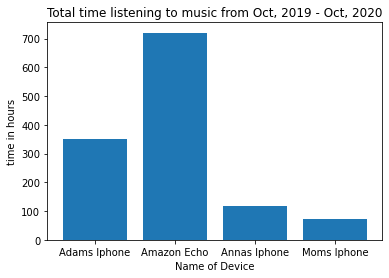

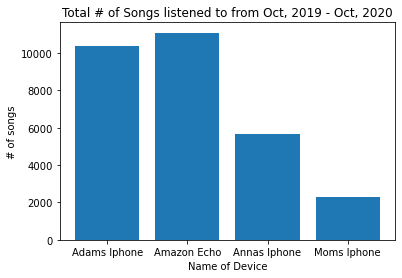

In [144]:
# Groups df by Device Identifier
grouped_by_device = df.groupby("Device Identifier")
x = []
y1 = []
y2 = []

# sets x values to be names of devices and y values to number of songs and total time
for group_name, group_df in grouped_by_device:
    x.append(group_name)
    y1.append(group_df["Content Name"].count())
    y2.append(group_df["Play Duration Hours"].sum())

#creates two seperate graphs
utils.Total_Time_by_device(x,y2)
utils.Song_Counts_by_device(x,y1)

Notible obserbations from the above graph:
1. In the "Time Listening Graph", the Amazon Echo is by far the device that played the most music.
2. While the Amazon Echo is the device with the most total time of music played, as demonstrated in the "Total Songs Listened to" graph, Adam's Iphone almost reaches the Amazon Echo for the title of most songs played. This tells us that I skip much more songs than the Amazon Alexa.

#### Change in total time listening to music by month

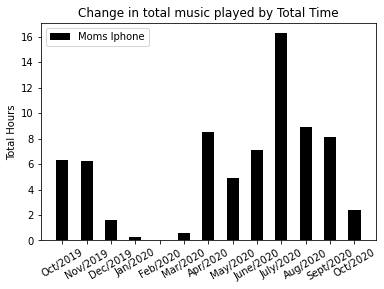

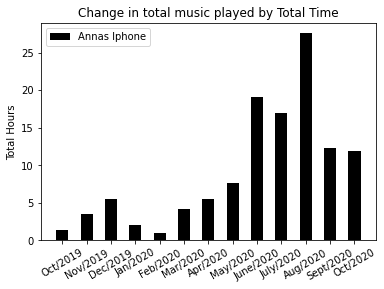

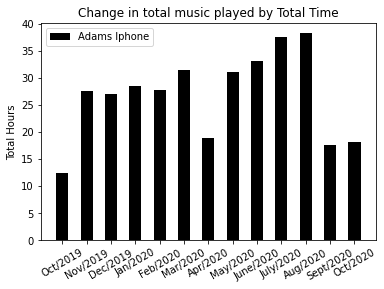

In [145]:
#Groups Data By Month
grouped_by_month = df.groupby("month",sort=False)
x = [] 
y1 = [] 
y2 = [] 
y3 = [] 
y4 = []

#collects y values 
for group_name, group_df in grouped_by_month:
    x.append(group_name)
    grouped_by_device = group_df.groupby("Device Identifier")
    for group_name, group_df in grouped_by_device:
        if (group_name == "Moms Iphone"):
            y1.append((group_df["Play Duration Hours"].sum()))
        if (group_name == "Annas Iphone"):
            y2.append((group_df["Play Duration Hours"].sum()))
        if (group_name == "Adams Iphone"):
            y3.append((group_df["Play Duration Hours"].sum()))

#graphs data
utils.Change_By_Total_Time(x,y1,"Moms Iphone")
utils.Change_By_Total_Time(x,y2,"Annas Iphone")
utils.Change_By_Total_Time(x,y3,"Adams Iphone")

Notible observations from the above graphs:
1. For the Graph of Mom's Iphone, the bars seem to spike in the summer months. This is becasue those summer are biking season for my mom, when she listens to the most music.
2. For the Graph of Anna's Iphone, there is large increase in total time listened to starting at June. After asking my sister why this may be, we discovered that it's because she got a new car in June, and the car jams came in clutch.
3. For the Graph of Adam's Iphone, the graph is much more balanced, which tells us that Adam likes to listen to music almost equally throughout the year.

#### Genres Played By Device

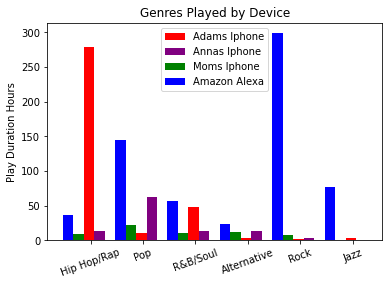

In [146]:
#group data by genre
grouped_by_genre = df.groupby("genre", sort=False)
x = []
y1 = [] 
y2 = [] 
y3 = [] 
y4 = []

#collect y values
for group_name, group_df in grouped_by_genre:
    if (group_name == 'Hip Hop/Rap' or  group_name == "Pop" or group_name == "R&B/Soul" or
    group_name == "Alternative" or group_name == "Rock" or  group_name == "Jazz"):
        x.append(group_name)
        grouped_by_device = group_df.groupby("Device Identifier")
        for group_name, group_df in grouped_by_device:
            if (group_name == "Adams Iphone"):
                y1.append((group_df["Play Duration Hours"].sum()))
            if (group_name == "Annas Iphone"):
                y2.append((group_df["Play Duration Hours"].sum()))
            if (group_name == "Moms Iphone"):
                y3.append((group_df["Play Duration Hours"].sum()))
            if (group_name == "Amazon Echo"):
                y4.append((group_df["Play Duration Hours"].sum()))

#graph data
utils.Genres_by_Device(x,y1,y2,y3,y4)

Notible observations from the above graphs:
1. The Amazon Echo demonstrates a very high affection for Rock. This tells us that our family likes to rockout quite a bit throughout the day, which suprises me as I thought we were more jazzy.
2. Adam's Iphone demonstrates a deep passion for hip hop and hip hop only, which Adam tells us he can agree upon as hip hop is all he listens to.
3. Moms's Iphone Demonstrates an equal love for many genres to include Hip Hop, Pop, R&B Soul, Alternative, and Rock.
4. The sweet sound of Jazz seems to be only loved by the Amazon Echo, which explains why during a nice calm day in the Kowalchyk House Hold, Jazz is just the thing we need for our family room.

#### Reason for ending song by device

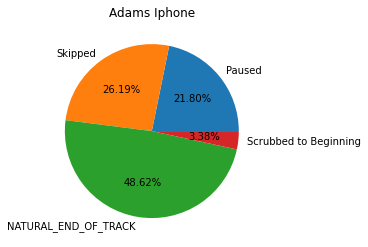

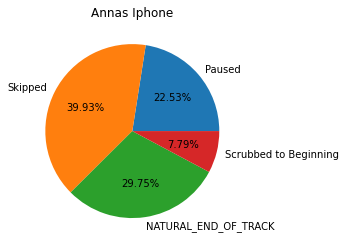

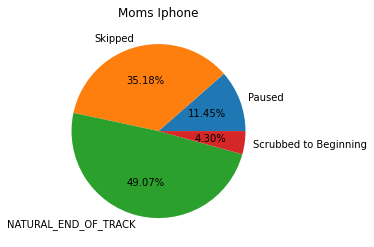

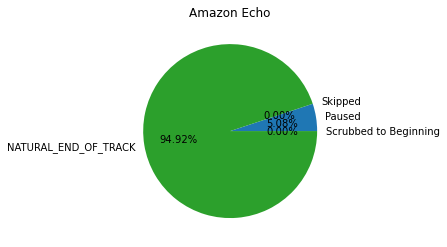

In [147]:
#group data by end reason type
grouped_by_end = df.groupby("End Reason Type", sort=False)
x = []
y1 = [] 
y2 = [] 
y3 = [] 
y4 = []
for group_name, group_df in grouped_by_end:
        x.append(group_name)
        grouped_by_device = group_df.groupby("Device Identifier")
        for group_name, group_df in grouped_by_device:
            if (group_name == "Adams Iphone"):
                y1.append((group_df["Content Name"].count()))
            elif (group_name == "Annas Iphone"):
                y2.append(group_df["Content Name"].count())
            elif (group_name == "Moms Iphone"):
                y3.append(group_df["Content Name"].count())
            elif (group_name == "Amazon Echo"):
                y4.append(group_df["Content Name"].count())
                
#updata Echo values
y4.append(0)
y4.append(0)
y4[2] = y4[1]
y4[1] = 0

#graph data
utils.reason_for_end(x, y1,y2,y3,y4)

Notible observations from the above graphs:
1. The Amazon Echo seems to just ride out to the end of the song mostly, as only 5% of the time do we Skip/Pause the song. This is true as usually during the day our family just likes to let Alexa play freely without messing with her too much.
2. Anna seems to skip the song more often than she finishes the song, does she not like any of her music? She also is the family member that seems to scrub back to the begginning of the song, which she explained to me helped her memorize the song.
3. My Sister and I seem pause a much larger majority of our songs than our Mom, which correlates to the fact that my mom isn't really capable of pausing her music while she bike rides.

## Hypothesis Testing
Because of the fact that most of my data is non-numerical, there wasn't much hypothesis testing I could do besides the average times for each song being played by device.

#### Hypothesis Question # 1: Do I listen to a song on average longer than my sister?

In [148]:
#groups by device
grouped_by_device = df.groupby("Device Identifier")
mu_1 = []
mu_2 = []

#creates mu_1 being Adam's Iphone play duration, and mu_1 being Anna's Iphone play duration
for group_name, group_df in grouped_by_device:
    if (group_name == "Adams Iphone"):
        mu_1 = group_df["Play Duration Hours"][0:50]
    elif (group_name == "Annas Iphone"):
        mu_2 = group_df["Play Duration Hours"][0:50]


Stating the NULL and Alternative Hypothesis:

$$H_0: \mu1 <= \mu2$$

$$H_1: \mu1 > \mu2$$

Level of Significance:

$$a = 0.05$$

Finding T-Critical from Confidence Interval Chart:

$$T-Critical = 2.364$$

If t-computed is > 2.364 , then Reject $H_0$.

If t-computed is <= 2.364 then Do Not Reject $H_0$.

Step #5: Make a Decison:

In [149]:
import scipy.stats as stats

t_computed = 0
p_val = 0
t_computed, p_val = stats.ttest_ind(mu_1, mu_2)
print("t-computed:", t_computed, " p-val:",p_val/2)

t-computed: 7.980537528980885  p-val: 1.3956811631512713e-12


Becasue t-computed is greater than  T-critical, and our p-value is less than our level of significance of 0.05, we can safely reject our hypothesis, and conclude that I listen to a song on average longer than my sister.

#### Hypothesis Question #2: Do i listen to a song on average longer than the Amazon Alexa?

In [150]:
#groups by device
grouped_by_device = df.groupby("Device Identifier")
mu_1 = []
mu_2 = []

#creates mu_1 being Adam's Iphone play duration, and mu_2 being the Amazon Echo's play duration
for group_name, group_df in grouped_by_device:
    if (group_name == "Adams Iphone"):
        mu_1 = group_df["Play Duration Hours"][500:600]
    elif (group_name == "Amazon Echo"):
        mu_2 = group_df["Play Duration Hours"][300:400]

Stating the NULL and Alternative Hypothesis:

$$H_0: \mu1 <= \mu2$$

$$H_1: \mu1 > \mu2$$

Level of Significance:

$$a = 0.05$$

Finding T-Critical from Confidence Interval Chart:

$$T-Critical = 2.364$$

If t-computed is > 2.364 , then Reject $H_0$.

If t-computed is <= 2.364 then Do Not Reject $H_0$.

Step #5: Make a Decison:

In [151]:
import scipy.stats as stats

t_computed = 0
p_val = 0
t_computed, p_val = stats.ttest_ind(mu_1, mu_2)
print("t-computed:", t_computed, " p-val:",p_val/2)

t-computed: -8.063806533419372  p-val: 3.4614608345619666e-14


Because T-computed is less than 2.364, and our p-value is very small, then we can conclude that the average time i play a song is less than the Amazon Echo.

#### Hypothesis Question #3: Do I listen to a song on average longer than 2 and a half minutes?

In [152]:
#groups by device
grouped_by_device = df.groupby("Device Identifier")
mu_1 = []

#creates mu_1 being Adam's Iphone play duration to be later tested with mu_2 which is 0.042 hours
for group_name, group_df in grouped_by_device:
    if (group_name == "Adams Iphone"):
        mu_1 = group_df["Play Duration Hours"][100:200]

Stating the NULL and Alternative Hypothesis:

$$H_0: \mu <= .042$$

$$H_1: \mu > .042$$

Level of Significance:

$$a = 0.01$$

Finding T-Critical from Confidence Interval Chart:

$$T-Critical = 2.364$$

If t-computed is > 2.364 , then Reject $H_0$.

If t-computed is <= 2.364 then Do Not Reject $H_0$.

In [153]:
t_computed = 0;
p_value = 0;

t_computed, p_value = stats.ttest_1samp(mu_1, .042)
print(t_computed, p_value)

-0.8199857802393377 0.41419407027329025


Becasue t-computed is less than  T-critical, we conclude that I most likely listen to a song on average less than 2 and a half minutes.

## Classification
For the classification of this data, I decided to choose the Device Identifier attribute to be classified. The features I decided to use to evaluate the classifier contains the following attributes:
1. Content Name (Song Title)
2. Artist Name
3. Genre
4. Content Provider (Sony Music, The Warner Music Group, etc.)
5. End Reason Type (Skipped, Paused, Natural End of the Track, (Scrubbed to Beginning)
6. Media Duration

##### Creating the feature vectors and class labels

In [154]:
#dropping culumns that do not correlate well to our column to be classified
X = df.drop(columns = {"Event End Timestamp","Feature Name",
"Event Start Timestamp", "month"
,"Play Duration Hours","Device Identifier"})

#converting all values in our X to string
X = X.applymap(str)

#Updating the genre category as our variable to be classified
y = df["Device Identifier"]

##### Label encoding our feature vectors to be numerical

In [155]:
from sklearn import preprocessing

#encoding
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)
print(X)

       Content Name  Artist Name  Media Duration In Milliseconds  \
0              2233         1754                            1689   
1              2390         1754                             266   
2              1699          866                             224   
3              2300         1650                              99   
4              2233         1754                            1689   
...             ...          ...                             ...   
29455          3216          338                             910   
29456          4258          788                            2045   
29457          4233         1531                            1864   
29458          4119          390                            2069   
29459          3121          435                            2481   

       Content Provider  End Reason Type  genre  
0                   104                1     26  
1                   104                3     26  
2                   111          

### Hold Out Method
##### Normalizing the Data using MinMaxScaler and splitting our data into a training set

In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#scaling and normalizing data
scaler = MinMaxScaler()
scaler.fit(X)
X_train_normalized = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)

##### Using a KNN Classifier, we preict our X-test and retrieve an accuraccy on how well the classifier works

In [157]:
from sklearn.neighbors import KNeighborsClassifier

#create our KNN classifier and fit our data
clf = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
clf.fit(X_train, y_train)

#predict our y values
y_predicted = clf.predict(X_test)
print(y_predicted)

#find our accuracy
accuracy = clf.score(X_test, y_test)
print("Acurracy: ", accuracy)

['Moms Iphone' 'Adams Iphone' 'Annas Iphone' ... 'Annas Iphone'
 'Annas Iphone' 'Adams Iphone']
Acurracy:  0.868295994568907


Notes: The above features seemed to give the best accuracy for our KNN Classifier. All of the features being used are non-numerical, with an acception to the media duration of the song which proved to have a very high correlation to the device being played. Also, using a nearest neighbor of one gave the best accuracy, anything higher and the accuracy would decrease. 

### Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier

#create our decision tree with no random state
tree_clf = DecisionTreeClassifier(random_state=0)

#fit our tree and make our predictions
tree_clf.fit(X_train, y_train)
y_predicted_tree = tree_clf.predict(X_test)
print(y_predicted_tree)

#find our accurracy
accuracy_tree = tree_clf.score(X_test, y_test)
print("Accuracy: ", accuracy_tree)

['Annas Iphone' 'Adams Iphone' 'Annas Iphone' ... 'Annas Iphone'
 'Annas Iphone' 'Adams Iphone']
Accuracy:  0.8750848608282417


Notes: As demonstrated above, our Decison Tree Classifier performed about the same as our KNN Classifier, although sometimes it performed just a tad better without a random state implemented. One thing to note is that there is not a max_depth assigned, as decreasing the depth of the tree would also decrease our accurracy. The height of our decision tree without a max depth is right around 20, which is a very large tree so the tree cannot be printed out.

## Conclusion

#### Key Findings
Overall, this project proved to be very interesting for both myself and my family. After finishing the project, I showed some of my key findings to my family and they were all quite amused, especially with the visualizations I was able to create and my hypothesis testing. These key findings included each device’s choice of genre, how long each device listened to music over the span of a year, the reason each device stopped listening to a song, and how many songs each device listened to.  
#### Classification
When it eventually came to classifying each device, I tested with many arrays of features, until eventually I was able to narrow down on six features that gave the best accuracy for the KNN Classifier. While some of these features were predicted to include the genre, artist name, and song title, other features that proved to have a strong correlation were the media duration of the song, reason the song was ended, and the content provider (Sony Music, etc.). The highest accuracy I was able to achieve was around 0.87, which is quite high although I believe that it could be higher if I didn’t include the Amazon Alexa to be classified which plays a large variety of music, therefore making it harder to classify. Also, with more time, adding more features from outside the current data set could also prove to help our classifier. 
#### StakeHolders and Ethics
For the possible stakeholders in this project, one of which is my family which as stated before, were fascinated by the results and didn’t necessarily know that all of this data could be found. Another possible stakeholder would be Amazon, as they might find it interesting to see how well the Alexa performed compared to the different iPhones in terms of the total music played. In terms of ethics, this is all of my own family's data so there are no boundaries crossed.